In [17]:
import numpy as np
import matplotlib as plt
from tqdm import tqdm

# This method computes the distance between two particles in a cubic box with pbcs
def distance_vector(r_i, r_j, L):
    r_i = np.array((r_i))
    r_j = np.array((r_j))
    dim = len(r_i)
    for i in range(dim):
        d_1D = np.abs(r_i[i]-r_j[i])
        if d_1D > L/2:
            if r_i[i] > r_j[i]:
                r_j[i] += L
            else:
                r_j[i] -= L
    dist = np.linalg.norm(r_i-r_j)
    return dist

# This method computes the force that a particle in position r_j exerts on a particle in r_i
def LJ_force(r_i, r_j, L):
    dist = distance_vector(r_i, r_j, L)
    r_c = 2.5
    F = []
    if dist <= r_c:
        dv_dr = 4*( -12/pow(r_c,13) + 6/pow(r_c,7))
        for i in range(len(r_i)):
            # Analytical form of the cutted-off force
            F.append((4*(12/pow(dist,13)-6/pow(dist,7))+dv_dr)*(r_i[i]-r_j[i])/dist)
    else:
        F= np.array([0.,0.,0.])
    return F

# This method returns the potential energy of two particles in positions r_i and r_j
def LJ_potential(r_i, r_j, L):
    dist = distance_vector(r_i, r_j, L)
    r_c = 2.5
    V_r = 4*(12/pow(dist,12)-6/pow(dist,6))
    V_rc = 4*(12/pow(r_c,12)-6/pow(r_c,6))
    dv_dr = 4*( -12/pow(r_c,13) + 6/pow(r_c,7))
    if dist < r_c:
        V = V_r-V_rc-dv_dr*(dist-r_c)
    else: 
        V = 0
    return V

# This method returns an array containing the total force acting on each particle 
def Forces(r_curr):
    F = np.zeros((N, 3))
    for i in range(N):
        F_i = np.zeros((3))
        for j in range(N):
            if i != j:
                F_i += np.array(LJ_force(r_curr[i], r_curr[j], L))
        F[i] = F_i
    return F

# This method returns a matrix containing the new postitions of the particles after one timestep
# It has a "start" parameter, because the first step of the integration has to be done "manually".
def Verlet_step(r_prev, r_curr, v_start, F, d_t, N, L, start):
    r_next = np.zeros((N, 3))
    # I separate the First step from a generic one
    for i in range(N):
        if start == False:
            r_next[i] = (np.array(r_curr[i])*2 - np.array(r_prev[i]) + pow(d_t,2)*np.array(F[i]))%L
        else:
            r_next[i] = (np.array(r_curr[i]) + d_t*np.array(v_start[i]) + (1/2)*pow(d_t,2)*np.array(F[i]))%L
        # I return the new position and the forces at the previous time
    return r_next


# This method prevents bad initialization to happen
# For instance avoids two particles being "spawned" too close to one another
def initial_state(L,N):
    r_curr = np.random.random((N, 3))*L
    good_start = False
    while good_start == False:
        counter = 0
        for i in range(N):
            for j in range(N):
                if j != i:
                    if distance_vector(r_curr[i],r_curr[j],L) < 1:
                        r_curr[i]=np.random.random(3)*L
                        counter += 1
        if counter == 0:
            good_start = True
    return r_curr

In [18]:
# Number of particles
N = 30
# Length of the cubic box containing the particles
L = 10
# I define the timestep
d_t = pow(10,-3)
# I define the number of timesteps that I want to take
n_timesteps = 1000
#t = 0

r_x, F_x = [], []
r_y, F_y = [], []
r_z, F_z = [], []

# A matrix storing the position of each particle at the current time
r_curr = initial_state(L,N)
F = Forces(r_curr)
r_x.append(r_curr[:,0])
r_y.append(r_curr[:,1])
r_z.append(r_curr[:,2])
F_x.append(F[:,0])
F_y.append(F[:,1])
F_z.append(F[:,2])

# A matrix storing the velocity of each particle at the current time velocities (initialized with v_i in (-5,+5))
v_start = np.random.random((N, 3))*10 - np.ones((N, 3))*5

start = True
r_prev = r_curr
r_next = Verlet_step(r_prev, r_curr, v_start, F, d_t, N, L, start)
r_curr = r_next
F = Forces(r_curr)
r_x.append(r_curr[:,0])
r_y.append(r_curr[:,1])
r_z.append(r_curr[:,2])
F_x.append(F[:,0])
F_y.append(F[:,1])
F_z.append(F[:,2])

# I let the set of particles evolve for n_timestep = 1000
start = False
for i in tqdm(range(n_timesteps-1)):
    temp_pos = r_curr
    r_curr = Verlet_step(r_prev, r_curr, v_start, F, d_t, N, L, start)
    F = Forces(r_curr)
    r_x.append(r_curr[:,0])
    r_y.append(r_curr[:,1])
    r_z.append(r_curr[:,2])
    F_x.append(F[:,0])
    F_y.append(F[:,1])
    F_z.append(F[:,2])
    r_prev = temp_pos
    #t += d_t

with open('r_x.txt','ab') as f:
        np.savetxt(f, np.array(r_x), fmt="%s")
with open('r_y.txt','ab') as f:
        np.savetxt(f, np.array(r_y), fmt="%s")
with open('r_z.txt','ab') as f:
        np.savetxt(f, np.array(r_z), fmt="%s")
with open('F_x.txt','ab') as f:
        np.savetxt(f, np.array(F_x), fmt="%s")
with open('F_y.txt','ab') as f:
        np.savetxt(f, np.array(F_y), fmt="%s")
with open('F_z.txt','ab') as f:
        np.savetxt(f, np.array(F_z), fmt="%s")




  0%|          | 0/999 [00:00<?, ?it/s]


  0%|          | 4/999 [00:00<00:26, 37.73it/s]


  1%|          | 9/999 [00:00<00:25, 38.65it/s]


  1%|▏         | 14/999 [00:00<00:24, 39.79it/s]


  2%|▏         | 18/999 [00:00<00:26, 37.29it/s]


  2%|▏         | 22/999 [00:00<00:26, 36.30it/s]


  3%|▎         | 27/999 [00:00<00:25, 37.76it/s]


  3%|▎         | 31/999 [00:00<00:26, 36.71it/s]


  4%|▎         | 35/999 [00:00<00:26, 35.91it/s]


  4%|▍         | 39/999 [00:01<00:26, 35.66it/s]


  4%|▍         | 43/999 [00:01<00:27, 34.39it/s]


  5%|▍         | 47/999 [00:01<00:27, 34.96it/s]


  5%|▌         | 51/999 [00:01<00:27, 34.99it/s]


  6%|▌         | 55/999 [00:01<00:27, 34.39it/s]


  6%|▌         | 59/999 [00:01<00:26, 35.24it/s]


  6%|▋         | 63/999 [00:01<00:26, 35.01it/s]


  7%|▋         | 67/999 [00:01<00:27, 33.87it/s]


  7%|▋         | 71/999 [00:01<00:26, 34.49it/s]


  8%|▊         | 75/999 [00:02<00:26, 34.22it/s]


  8%|▊         | 79/999 [00:02<00:26, 3

KeyboardInterrupt: 

In [3]:
 # Things to write in the report
    # Careful initialization in needed
    # Too much closeness causes high velocities
    # If one of the particles takes high speed, it is more likely to come close to other particles
    # This causes an "explosion" effect. 
    # The shortest the timestep the more likely this explosion effect is to happen
    # Energy should increase steadily in case an explosion happens
    # Energy is smoother for smaller timesteps

In [4]:
import matplotlib.pyplot as plt

# This method takes the positions along a specific axis in input
# and it returns returns an array containing the respective velocities on the same axis
def velocity(r_axis,v_start,axis,N,d_t):
    if axis == 'x': a = 0
    if axis == 'y': a = 1
    if axis == 'z': a = 2
    r_axis = np.array(r_axis)
    v_start = np.array(v_start)
    v_axis = []
    v_axis.append(v_start[:,a])
    for i in range(1,len(r_axis)-1):
        v_i = []
        for j in range(N):
            v_i.append((r_axis[i+1,j]-r_axis[i-1,j])/(2*d_t))
        v_axis.append(v_i)
    v_axis = np.array(v_axis)
    return v_axis
    
v_x = velocity(r_x,v_start,'x',N,d_t)
v_y = velocity(r_y,v_start,'y',N,d_t)
v_z = velocity(r_z,v_start,'z',N,d_t)

# Since the velocity can only be computed if next and previous positions are known
# I have to discard the last position of each particle
r_x.pop(), r_y.pop(), r_z.pop()


# I declare an array that will contain the kinetic energy "T" at each timestep
T = []

for i in range(len(v_x)):
    T_i = 0
    for j in range(N):
        T_i += (v_x[i,j]**2+v_y[i,j]**2+v_z[i,j]**2)/2            
    T.append(T_i)


# I declare an array that will contain the potential energy "V" at each timestep
V = []

for i in range(len(r_x)):
    V_i = 0
    x, y, z = r_x[i], r_y[i], r_z[i]
    # this matrix stores all the positions at time step i
    pos_i = np.c_[x,y,z]
    for j in range(N):
        for k in range(N):
            if j != k:
                V_i += LJ_potential(pos_i[j], pos_i[k], L)/2
    V.append(V_i)

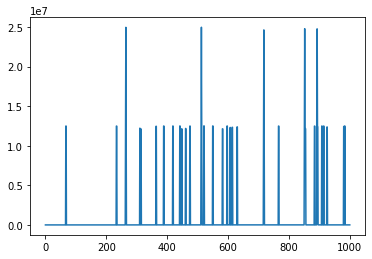

In [5]:
V = np.array(V)
T = np.array(T)
# I sum the two arrays to get the total energy at each timestep
H = V + T
a = np.linspace(0,len(r_x),len(r_x))
plt.plot(a,H)
plt.show()

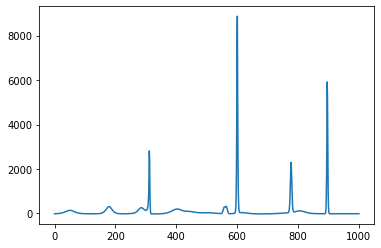

In [6]:
a = np.linspace(0,len(r_x),len(r_x))
plt.plot(a,V)
plt.show()

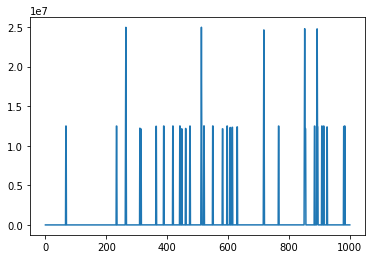

In [7]:
a = np.linspace(0,len(v_x),len(v_x))
plt.plot(a,T)
plt.show()